In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
dataset03 = pd.read_csv("BATADAL_dataset03.csv")
dataset04 = pd.read_csv("BATADAL_dataset04.csv")

In [3]:
dataset03= dataset03.drop("ATT_FLAG",axis=1,inplace=False) 
#dataset03.head()
dataset03 = dataset03.loc[:,dataset03.columns!='DATETIME'] 
dataset03.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,26.426495,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471
1,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,26.422962,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256
2,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,26.427771,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538
3,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,26.519985,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952
4,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,26.671642,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(dataset03)
X_train_nom = scaler.transform(dataset03)
#print 'mean:',X_train_nom.mean(axis=0) #inspect the mean and the variance
#print 'variance:', X_train_nom.std(axis=0)

In [5]:
# function of deciding the number of eigenvalue to use for PCA
def percentage2n(eigVals,percentage):  
    sortArray=np.sort(eigVals)   
    sortArray=sortArray[-1::-1]   
    arraySum=sum(sortArray)  
    tmpSum=0  
    num=0  
    for i in sortArray:  
        tmpSum+=i  
        num+=1  
        if tmpSum>=arraySum*percentage:  
            return num,sortArray

In [7]:
# find the number of eigenvalue
covMat=np.cov(dataset03,rowvar=0)
eigVals,eigVects=np.linalg.eig(np.mat(covMat)) 
num,sortArray = percentage2n(eigVals,0.99)
print ('Number of principle component:',num)    # 6 principle component
#print 'array of eigenvalue:',sortArray        # variance

Number of principle component: 6


In [8]:
# define the function of PCA. return the reconstructed data and principle eigenvectors.
def pca(newData,n):   
    covMat=np.cov(newData,rowvar=0)    #calculate covariance matrix  
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))  
    eigValIndice=np.argsort(eigVals)             
    n_eigValIndice=eigValIndice[-1:-(n+1):-1]    
    n_eigVect=eigVects[:,n_eigValIndice]         
    lowDDataMat=newData*n_eigVect                
    reconMat=(lowDDataMat*n_eigVect.T)  #reconstructed data 
    return n_eigVect,reconMat

In [9]:
P,X_train_rec = pca(X_train_nom,num)

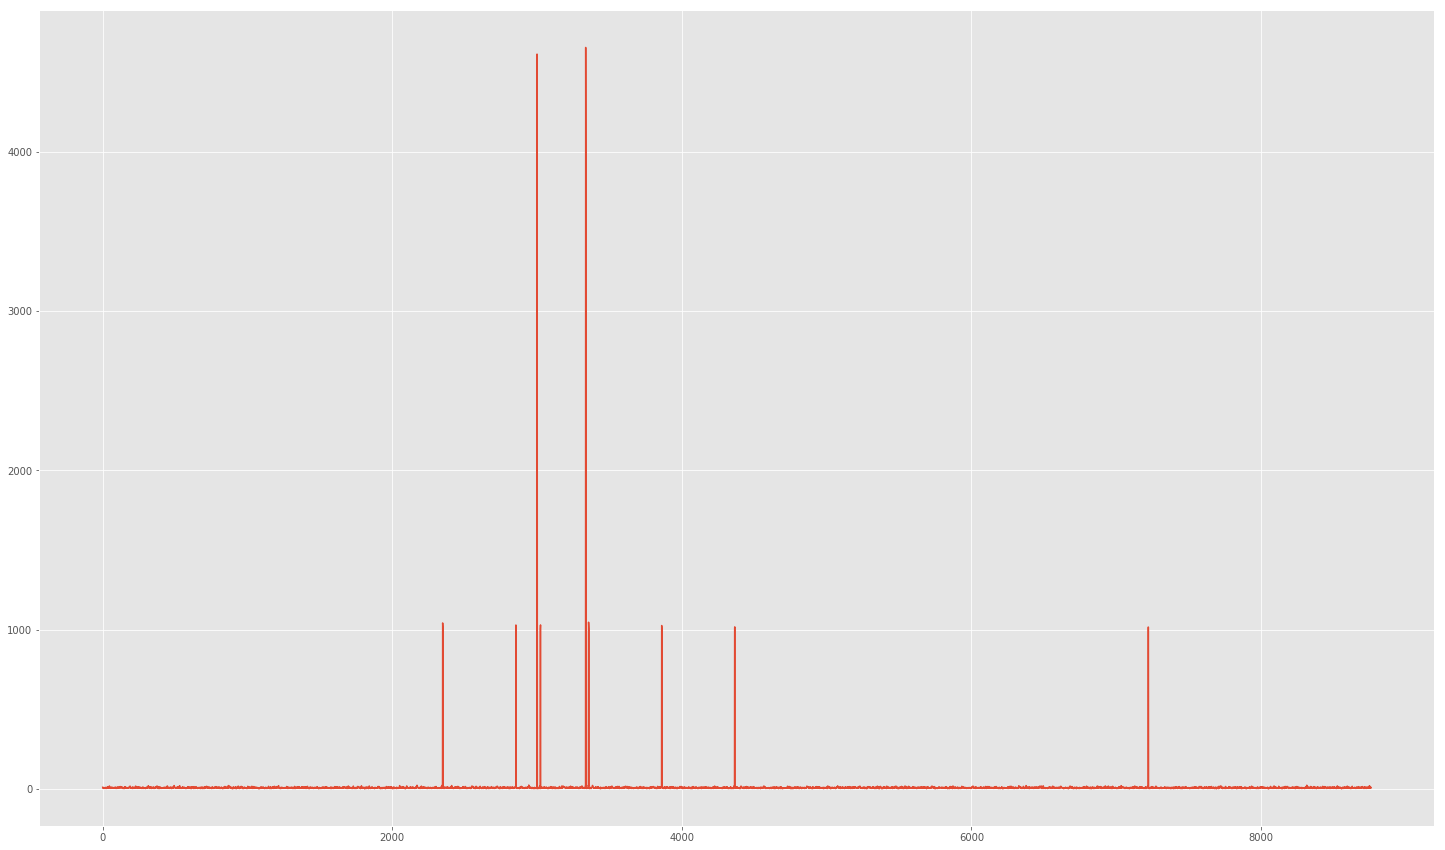

<Figure size 1800x720 with 0 Axes>

In [10]:
residual_pca1 = X_train_nom - X_train_rec
residual_pca2 = np.square(residual_pca1)
residual_pca = residual_pca2.sum(axis=1) 

figure, ax = plt.subplots(figsize=[25,15])
plt.figure(figsize=[25,10])
ax.plot(residual_pca)

In [ ]:
# we removed the data of 2015-12-22 due to its unstability.
X_train_1 = X_train['2015-12-23':]

In [12]:
#pREPROCESSING FOR DATASET04
import pandas as pd
dataset04 = pd.read_csv("BATADAL_dataset04.csv")
dataset04_compare = dataset04
dataset04 = dataset04.drop(" ATT_FLAG",axis=1,inplace=False) 
#dataset04.head()
dataset04 = dataset04.loc[:,dataset04.columns!='DATETIME'] 
dataset04.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,2.44,5.24,3.19,4.10,2.86,5.50,4.39,93.63,1.0,93.65,...,28.26,70.00,28.22,85.87,21.69,82.72,21.58,71.99,39.33,29.64
1,2.66,4.53,3.20,4.18,3.29,5.44,4.53,89.41,1.0,89.43,...,24.39,87.73,24.45,84.87,29.81,86.62,29.81,59.76,42.17,26.15
2,3.11,3.66,3.66,4.21,3.87,5.15,3.22,89.88,1.0,89.89,...,23.84,89.29,23.90,87.11,29.85,87.64,29.85,58.50,42.00,25.56
3,3.62,3.04,4.17,4.04,3.56,4.98,2.40,88.10,1.0,88.12,...,27.00,91.98,27.10,68.75,31.60,64.25,31.47,72.30,43.24,28.38
4,4.08,2.68,4.73,3.20,3.11,5.39,3.46,87.01,1.0,87.03,...,26.67,92.11,26.76,68.74,32.30,64.23,32.17,72.53,44.00,28.04


In [13]:
#first, we need to normalize the input matrix (zero mean and unit variance)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(dataset04)
X_train_nom = scaler.transform(dataset04)
#print 'mean:',X_train_nom.mean(axis=0)
#print 'variance:',X_train_nom.std(axis=0)

In [15]:

# find the number of eigenvalue# find t 
covMat=np.cov(X_train_nom,rowvar=0)
eigVals,eigVects=np.linalg.eig(np.mat(covMat)) 
num,sortArray = percentage2n(eigVals,0.99)
print ('number of principle component:',num )    # 6 principle component
print ('array of eigenvector:',sortArray) # variance

number of principle component: 17
array of eigenvector: [7.31641152e+00 4.75097933e+00 4.66254272e+00 3.47832835e+00
 2.66987990e+00 2.50756422e+00 2.01049800e+00 1.90089649e+00
 1.54088539e+00 1.16987464e+00 9.10333475e-01 8.99335139e-01
 7.09421029e-01 5.75864245e-01 2.68060625e-01 2.03706825e-01
 1.71498727e-01 9.17992890e-02 5.01372585e-02 4.14984648e-02
 2.43707994e-02 1.56917969e-02 1.29171476e-02 1.04093648e-02
 6.77369596e-03 3.04925255e-03 2.34350922e-03 1.54007274e-03
 6.99765362e-04 5.23698789e-04 3.50721314e-04 3.25004224e-04
 8.95482459e-05 1.86584872e-05 1.13772841e-06 8.84409697e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [19]:
num=36 ## only use the smallest non-zero eigenvalue.
P,X_train_rec = pca(X_train_nom,num)

In [20]:
#calculate the threshold, according to the paper "Diagnosing Network-Wide Traffic Anomalies"
lambda1 = sortArray
lambda2 = np.power(sortArray,2)
lambda3 = np.power(sortArray, 3)

fi1 = sum(lambda1[num:])
fi2 = sum(lambda2[num:])
fi3 = sum(lambda3[num:])
h0 = 1-2.0*fi1*fi3 /(3*(fi2**2))
Ca=2.99
threshold = fi1 * np.power(1.0 * Ca * np.sqrt(2* fi2 * (h0 ** 2)) / fi1
                           + 1 + 1.0 * fi2 * h0 * (h0-1) / (fi1 ** 2) , 1.0 / h0)
print (fi1,fi2,fi3,h0,threshold)

0.0 0.0 0.0 nan nan


C:\Users\Nivedita Prasad\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars


C:\Users\Nivedita Prasad\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in greater


percentage of Abnormal data in training data: [[0.]]


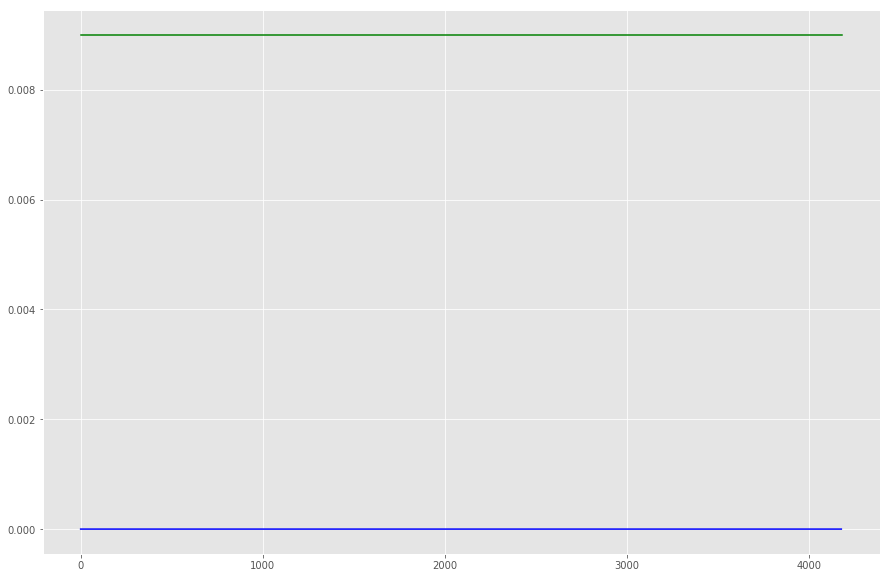

<Figure size 1800x720 with 0 Axes>

In [22]:
residual_pca1 = X_train_nom - X_train_rec
residual_pca2 = np.square(residual_pca1)
residual_pca = residual_pca2.sum(axis=1) 

figure, ax = plt.subplots(figsize=[15,10])
plt.figure(figsize=[25,10])
ax.plot(residual_pca,'b')
ax.plot([0,len(residual_pca)],[threshold,threshold],'r')
ax.plot([0,len(residual_pca)],[0.009,0.009],'g')
print ('percentage of Abnormal data in training data:', 1.0 * sum(residual_pca>threshold)/len(residual_pca))

In [23]:
#test
X_test_nom = scaler.transform(X_test) # apply the same normalization with training data
lowDDataMat_test=X_test_nom*P       # apply the same pca with training data
reconMat_test=(lowDDataMat_test*P.T)
residual_test1 = X_test_nom-reconMat_test
residual_test2 = np.square(residual_test1)
residual_test = residual_test2.sum(axis=1) 

figure, ax = plt.subplots(figsize=[10,5])
ax.plot(residual_test>threshold,'b')# plot the predicted label
ax.plot(1*y_test.values,'r')# plot the true label

NameError: name 'X_test' is not defined

In [24]:
residual_test = np.array(residual_test).reshape([1,449919])[0]

NameError: name 'residual_test' is not defined

In [ ]:
predict_y = residual_test > threshold

In [ ]:

tptp  ==  sumsum((predict_ypredict_  * y_test.values)
print 'TP:',tp
fp = sum((y_test.values - predict_y)==-1)
print 'FP:',fp
tn = sum(predict_y[y_test.values==0]==0)
print 'TN:',tn
fn = sum(predict_y[y_test.values==1]==0)
print 'FN:',fn
print 'precision:' ,1.0 * tp/(tp+fp)
print 'recall:' ,1.0 * tp/(tp+fn)

In [ ]:
residual_test = np.array(residual_test).reshape([1,449919])[0]
threshold_1 = 0.009
predict_y = residual_test > threshold_1
tp = sum(predict_y * y_test.values)
print 'TP:',tp
fp = sum((y_test.values - predict_y)==-1)
print 'FP:',fp
tn = sum(predict_y[y_test.values==0]==0)
print 'TN:',tn
fn = sum(predict_y[y_test.values==1]==0)
print 'FN:',fn

print 'precision:' ,1.0 * tp/(tp+fp)
print 'recall:' ,1.0 * tp/(tp+fn)